         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Passed   No. Observations:                   15
Model:                          Logit   Df Residuals:                       13
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 Oct 2024   Pseudo R-squ.:                   1.000
Time:                        18:15:02   Log-Likelihood:            -3.0095e-08
converged:                      False   LL-Null:                       -9.5477
Covariance Type:            nonrobust   LLR p-value:                 1.243e-05
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -198.0871   6.34e+04     -0.003      0.998   -1.24e+05    1.24e+05
Hours_Studied    36.0319   1.16e+04      0.003      0.99

/Users/jamievuong/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


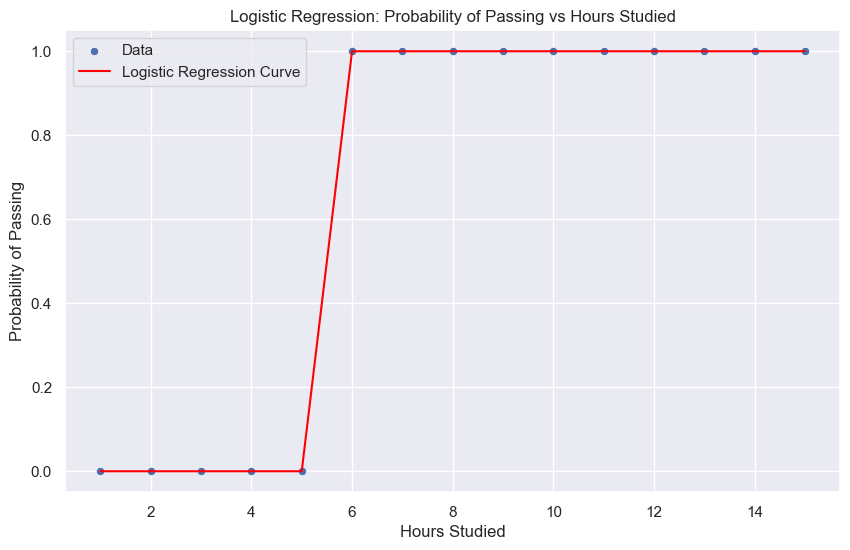

In [7]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Set plot style using Seaborn
sns.set(style='darkgrid')

# Example DataFrame with additional data points to avoid singular matrix issue
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'Passed': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

# Prepare the data
X = df['Hours_Studied']  # Predictor variable
y = df['Passed']         # Target variable

# Add a constant to the predictor variable (intercept term)
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the model summary
print(result.summary())

# Make predictions
df['Predicted_Prob'] = result.predict(X)
df['Predicted_Class'] = (df['Predicted_Prob'] >= 0.5).astype(int)

# Plot the data and the logistic regression curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Passed', data=df, label='Data')
sns.lineplot(x='Hours_Studied', y='Predicted_Prob', data=df, color='red', label='Logistic Regression Curve')
plt.title('Logistic Regression: Probability of Passing vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.legend()
plt.show()

Logistic regression is primarily used for binary classification tasks, where the goal is to predict one of two possible outcomes (like yes/no, true/false, success/failure). Unlike linear regression, which predicts a continuous outcome, logistic regression predicts probabilities that can then be mapped to class labels (typically 0 and 1). Here's how it's commonly applied:

1. **Binary Classification**: Logistic regression is often used when there are two possible classes, such as spam vs. not spam in email filtering or disease presence vs. absence in medical diagnostics.

2. **Predicting Probabilities**: Logistic regression estimates the probability of a certain class, making it useful for applications needing probabilistic predictions, like credit risk scoring or customer churn likelihood.

3. **Multi-class Classification**: While basic logistic regression is binary, variations like "multinomial logistic regression" or "one-vs-rest" logistic regression extend its use to multi-class classification problems (e.g., classifying different species of plants or multiple sentiment categories).

4. **Interpretability**: Logistic regression provides coefficients that explain the impact of each feature, making it popular in fields like social sciences, healthcare, and finance, where understanding feature importance is valuable.

5. **When There’s a Linear Decision Boundary**: Logistic regression works well if there's a linear relationship between input features and the probability of the outcome. 

Its simplicity, interpretability, and effectiveness in many real-world scenarios make logistic regression a popular starting choice for classification tasks in machine learning.

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                   70
Model:                          Logit   Df Residuals:                       65
Method:                           MLE   Df Model:                            4
Date:                Mon, 28 Oct 2024   Pseudo R-squ.:                   1.000
Time:                        18:21:48   Log-Likelihood:            -1.9365e-07
converged:                      False   LL-Null:                       -48.406
Covariance Type:            nonrobust   LLR p-value:                 4.692e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0597   4.77e+07   -1.9e-07      1.000   -9.34e+07    9.34e+07
x1           -63.3517   6.82e+07  -9.29e-07      1.000   -1.34e+0

/Users/jamievuong/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


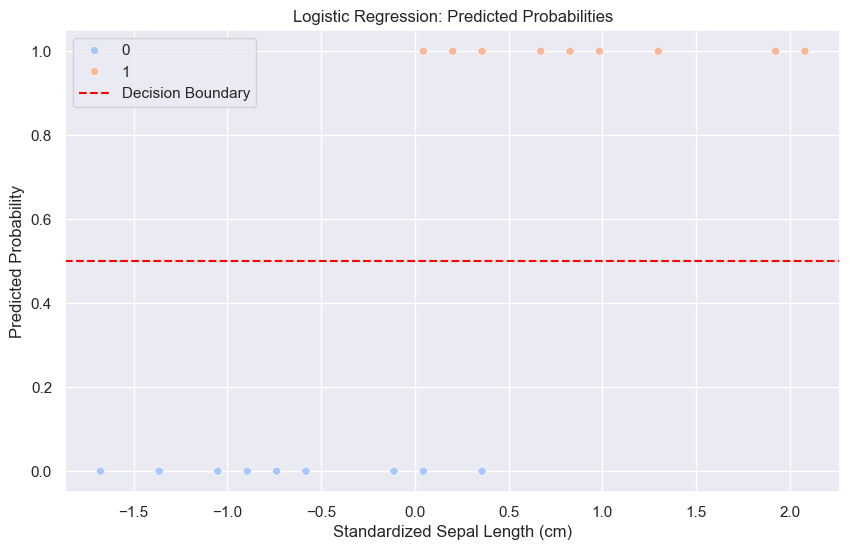

In [10]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set plot style using Seaborn
sns.set(style='darkgrid')

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Select only two species for binary classification (Setosa and Versicolor)
df = df[df['species'] != 2]

# Prepare the data
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]  # Predictor variables
y = df['species']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a constant to the predictor variables (intercept term)
X_scaled = sm.add_constant(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the model summary
print(result.summary())

# Make predictions on the test set
y_pred_prob = result.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot the predicted probabilities
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 1], y=y_pred_prob, hue=y_test, palette='coolwarm')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary')
plt.title('Logistic Regression: Predicted Probabilities')
plt.xlabel('Standardized Sepal Length (cm)')
plt.ylabel('Predicted Probability')
plt.legend()
plt.show()

### What is Logistic Regression?

Logistic regression is a statistical method used for binary classification problems, where the outcome or dependent variable is categorical and typically takes on two possible values (e.g., 0 and 1, True and False, Yes and No). Unlike linear regression, which predicts a continuous outcome, logistic regression predicts the probability that a given input point belongs to a certain class.

### How Does Logistic Regression Work?

Logistic regression uses the logistic function (also known as the sigmoid function) to model the probability of the dependent variable. The logistic function is defined as:

\[ \sigma(z) = \frac{1}{1 + e^{-z}} \]

where \( z \) is a linear combination of the input features:

\[ z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n \]

Here, \( \beta_0 \) is the intercept, \( \beta_1, \beta_2, \ldots, \beta_n \) are the coefficients, and \( x_1, x_2, \ldots, x_n \) are the input features.

The logistic function maps any real-valued number into the range [0, 1], making it suitable for modeling probabilities.

### What is Logistic Regression Used For?

Logistic regression is widely used for various binary classification tasks, including but not limited to:

1. **Medical Diagnosis**: Predicting whether a patient has a particular disease (e.g., cancer, diabetes) based on medical test results.
2. **Credit Scoring**: Determining whether a loan applicant is likely to default on a loan.
3. **Spam Detection**: Classifying emails as spam or not spam.
4. **Customer Churn**: Predicting whether a customer will leave a service or continue using it.
5. **Marketing**: Predicting whether a customer will buy a product based on their demographic and behavioral data.

### Example: Logistic Regression in Python

Here is an example of how to fit a logistic regression model using the `statsmodels` library in Python:


### Explanation

1. **Load the Data**: Load the Iris dataset and select only two species for binary classification.
2. **Prepare the Data**: Extract the features and target variable, standardize the features, and add a constant term.
3. **Split the Data**: Split the data into training and testing sets.
4. **Fit the Model**: Fit the logistic regression model using the training data.
5. **Evaluate the Model**: Make predictions on the test set and evaluate the model's performance using accuracy, confusion matrix, and classification report.

This example demonstrates how to use logistic regression for binary classification tasks, providing a practical implementation in Python.

In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Display the first few rows of the dataset
print(df.head())

# Prepare the data
# Drop rows with missing values
df = df.dropna(subset=['age', 'embarked', 'fare'])

# Convert categorical variables into numerical format
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Select features and target variable
X = df[['pclass', 'sex', 'age', 'fare', 'embarked']]  # Predictor variables
y = df['survived']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a constant to the predictor variables (intercept term)
X_scaled = sm.add_constant(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the model summary
print(result.summary())

# Make predictions on the test set
y_pred_prob = result.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Optimization terminated successfully.
         Current function value: 0.416865
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived 